# Gym Crowdedness Analysis

The global COVID-19 pandemic has forced industries that depend on high customer traffic to their premises to restrategize so that they can remain profitable and still serve their customer base. One such sector is the fitness industry where certain gym classes have been recorded as 'superspreading' events, and crowding/high demand makes it difficult to enforce social distancing guidelines.
Analysing hourly data on the number of people at a gym to identify the most and least busy hours can result in a creative solution.

The 3 main objectives of this analysis are to find out:
1. What is the least busy hour and day at a gym that caters to college students? i.e. On which days can the gym offer specialised classes or offers to attract customers that normally visit on busier days?
2. At what point in the calendar/school year is the gym busiest?
3. How does temperature affect traffic at the gym?

The data used for this analysis is the number of people at a gym recorded approximately every 10 minutes from August 2015 to March 2017. The data includes information on the hour, day of the week, month, whether it is a weekend or holiday, the point in the school calendar year and temperature. The dataset was obtained from Kaggle (https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym) and collected with the consent of the university and the gym.

In [12]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
# Loading the data
gym = pd.read_csv("data.csv")
gym.head(15)

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
5,46,2015-08-14 18:00:18-07:00,64818,4,0,0,72.15,0,0,8,18
6,43,2015-08-14 18:20:08-07:00,66008,4,0,0,72.15,0,0,8,18
7,53,2015-08-14 18:30:09-07:00,66609,4,0,0,72.15,0,0,8,18
8,54,2015-08-14 18:40:14-07:00,67214,4,0,0,72.15,0,0,8,18
9,43,2015-08-14 18:50:15-07:00,67815,4,0,0,72.15,0,0,8,18


In [15]:
# Descriptive statistics
gym.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


Insights:
* The number of people at each timestamp ranges from 0 to 145 people. 
* The day of the week and month were recorded numerically from 0 (monday) to 6 (Sunday) and 1 (January) to 12 (December), respectively. 
* Hours are recorded on 23-hour format from 0 (midnight) to 23 (11pm). 
* Boolean variables are recorded as 0 for False and 1 for True. 
* Temperatures were recorded in degrees farenheit and are within a reasonable range for a location in the USA.

In [16]:
# Data characteristics
gym.info()
gym.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

Insights:
* The date and boolean variables need to be changed to the correct data types.
* There is no missing data in this dataset.

In [17]:
# Changing date data type
import dateutil
gym['date'] = gym['date'].apply(dateutil.parser.parse, ignoretz = True)
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   number_people         62184 non-null  int64         
 1   date                  62184 non-null  datetime64[ns]
 2   timestamp             62184 non-null  int64         
 3   day_of_week           62184 non-null  int64         
 4   is_weekend            62184 non-null  int64         
 5   is_holiday            62184 non-null  int64         
 6   temperature           62184 non-null  float64       
 7   is_start_of_semester  62184 non-null  int64         
 8   is_during_semester    62184 non-null  int64         
 9   month                 62184 non-null  int64         
 10  hour                  62184 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(9)
memory usage: 5.2 MB


In [18]:
# Changing variables to boolean
gym[['is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester']] = gym[['is_weekend', 'is_holiday', 'is_start_of_semester', 'is_during_semester']].astype('bool')
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   number_people         62184 non-null  int64         
 1   date                  62184 non-null  datetime64[ns]
 2   timestamp             62184 non-null  int64         
 3   day_of_week           62184 non-null  int64         
 4   is_weekend            62184 non-null  bool          
 5   is_holiday            62184 non-null  bool          
 6   temperature           62184 non-null  float64       
 7   is_start_of_semester  62184 non-null  bool          
 8   is_during_semester    62184 non-null  bool          
 9   month                 62184 non-null  int64         
 10  hour                  62184 non-null  int64         
dtypes: bool(4), datetime64[ns](1), float64(1), int64(5)
memory usage: 3.6 MB


In [19]:
# Adding month and day names
months_days = {"day_of_week":     {0: "Mon", 1: "Tue", 2: "Wed", 3:"Thu", 4: "Fri", 5: "Sat", 6: "Sun"},
                "month": {1: "Jan", 2: "Feb", 3:"Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9:"Sep", 10: "Oct", 11: "Nov", 12: "Dec"}}
gym.replace(months_days, inplace=True)
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11,61211,Fri,False,False,71.76,False,False,Aug,17
1,45,2015-08-14 17:20:14,62414,Fri,False,False,71.76,False,False,Aug,17
2,40,2015-08-14 17:30:15,63015,Fri,False,False,71.76,False,False,Aug,17
3,44,2015-08-14 17:40:16,63616,Fri,False,False,71.76,False,False,Aug,17
4,45,2015-08-14 17:50:17,64217,Fri,False,False,71.76,False,False,Aug,17


In [20]:
# Checking for duplicates
gym.duplicated().sum()

0

The timestamp is the number of seconds since the beginning of the day, which will not be needed for this analysis and therefore this variable can be dropped. 

In [21]:
# Dropping timestamp column
df = gym.drop(columns =['timestamp'])
df.head()

,number_people,date,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11,Fri,False,False,71.76,False,False,Aug,17
1,45,2015-08-14 17:20:14,Fri,False,False,71.76,False,False,Aug,17
2,40,2015-08-14 17:30:15,Fri,False,False,71.76,False,False,Aug,17
3,44,2015-08-14 17:40:16,Fri,False,False,71.76,False,False,Aug,17
4,45,2015-08-14 17:50:17,Fri,False,False,71.76,False,False,Aug,17


In [43]:
# Exporting cleaned data
df.to_csv("gym_cleaned.csv")

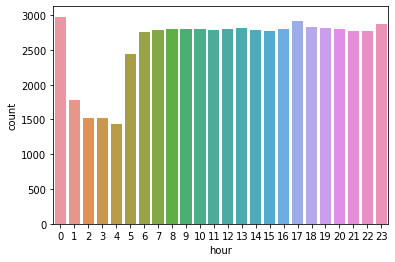

In [22]:
# Checking distribution of records - hour
sns.countplot(data = df, x = 'hour')

There are less records from the morning hours but the rest are almost even.

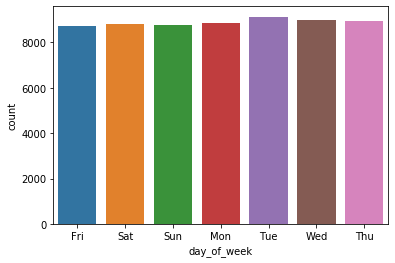

In [23]:
# Checking distribution of records - day of week
sns.countplot(data = df, x = 'day_of_week')

Data was collected relatively evenly across days of the week.

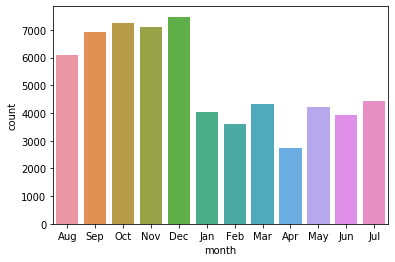

In [24]:
# Checking distribution of records - month
sns.countplot(data = df, x = 'month')

There are more data points from the later months of the year, therefore sum should not be used as a measure for number of people.

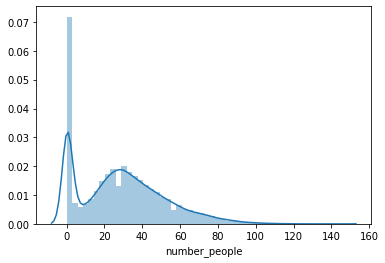

In [25]:
# Distribution - number of people
sns.distplot(df['number_people'])

There are multiple records where there are 0 people at the gym.

## 1. What is the least busy hour and day at the gym?

In [26]:
# Table of average number of people by hour
df.groupby('hour').agg(total = ('number_people', 'sum'), average = ('number_people', 'mean'))

,total,average
hour,,
0,43837,14.720282
1,4284,2.404040
2,271,0.178289
3,220,0.145023
4,401,0.279054
5,2551,1.045063
6,24169,8.763234
7,42962,15.393049
8,67304,24.054325


The least busy hours are between midnight and 8am. The gym is most crowded between 4 pm and 11 pm, with the most people attending between 6 and 7 pm.

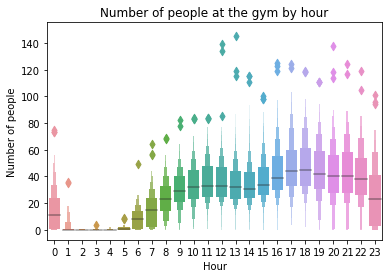

In [51]:
# Number of people by hour
plt.figure()
sns.boxenplot(data = df, x = 'hour', y = 'number_people')
plt.title('Number of people at the gym by hour')
plt.ylabel("Number of people")
plt.xlabel('Hour')
plt.show()

From the plot and table above, the gym is least busy between 12am and 8am.

In [28]:
# Table of average number of people by day of the week
df.groupby('day_of_week').agg(total = ('number_people', 'sum'), average = ('number_people', 'mean'))

,total,average
day_of_week,,
Fri,261196,29.957105
Mon,288590,32.653315
Sat,202524,22.956699
Sun,198320,22.618613
Thu,269721,30.217455
Tue,296140,32.435926
Wed,291356,32.441376


The gym is least busy during the weekend, and most busy at the beginning of the week.

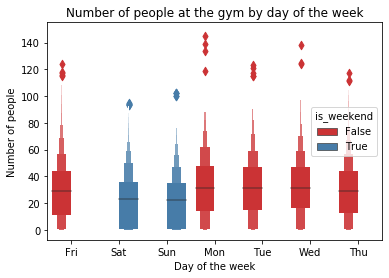

In [165]:
# Number of people by day of the week
plt.figure()
sns.boxenplot(data = df, x = 'day_of_week', y = 'number_people', hue = 'is_weekend', palette = 'Set1', dodge = 'False')
plt.title('Number of people at the gym by day of the week')
plt.ylabel("Number of people")
plt.xlabel('Day of the week')
plt.show()

From the plot and table above, the gym is least busy during the weekend. 

In [30]:
# Probability of finding no one at the gym at a certain hour
df[df['number_people'] == 0].groupby('hour').size().div(len(df))

hour
0     0.011723
1     0.016853
2     0.020632
3     0.021308
4     0.017706
5     0.017545
6     0.009745
7     0.005371
8     0.001270
9     0.001077
10    0.000627
11    0.000338
12    0.000257
13    0.000241
14    0.000289
15    0.000402
16    0.000418
17    0.000370
18    0.000547
19    0.001142
20    0.001785
21    0.002509
22    0.002557
23    0.006400
dtype: float64

In [31]:
# Probability of finding no one at the gym - day of the week
df[df['number_people'] == 0].groupby('day_of_week', as_index = False).size().div(len(df))

day_of_week
Fri    0.016885
Mon    0.017062
Sat    0.027596
Sun    0.031471
Thu    0.017786
Tue    0.015149
Wed    0.015165
dtype: float64

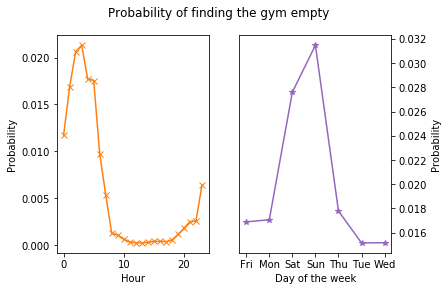

In [167]:
# Plotting likelihood of finding the gym empty by hour and day of week
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Probability of finding the gym empty')
ax1.plot(df[df['number_people'] == 0].groupby('hour').size().div(len(df)), 'tab:orange', marker = 'x')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Hour')
ax2.plot(df[df['number_people'] == 0].groupby('day_of_week').size().div(len(df)), 'tab:purple', marker = '*')
ax2.set_xlabel('Day of the week')
ax2.set_ylabel('Probability')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.show()

From the analysis above, the gym is more likely to be empty between midnight and early morning hours, and during the weekend.

In [33]:
# Confirming that weekends are less busy
df.groupby('is_weekend').agg(total = ('number_people', 'sum'), average = ('number_people', 'mean'))

,total,average
is_weekend,,
False,1407003,31.551397
True,400844,22.788175


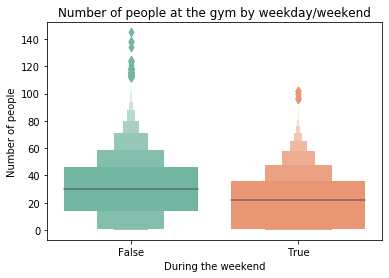

In [45]:
# Plotting weekend vs other days
sns.boxenplot(data = df, x = 'is_weekend', y = 'number_people', palette = 'Set2')
plt.title('Number of people at the gym by weekday/weekend')
plt.ylabel("Number of people")
plt.xlabel('During the weekend')
plt.show()

The gym is most crowded on weekdays.

## 2. How does the time of year affect traffic to the gym?

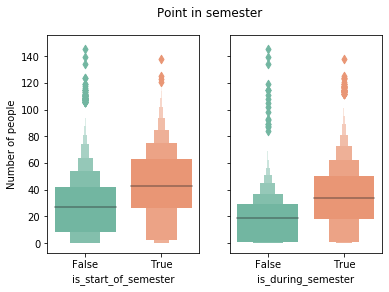

In [169]:
# Plot - during semester
fig, axs = plt.subplots(ncols=2, sharey = True)
sns.boxenplot(data = df, x = 'is_during_semester', y = 'number_people', ax = axs[1], palette = 'Set2')
sns.boxenplot(data = df, x = 'is_start_of_semester', y = 'number_people', ax = axs[0], palette = 'Set2')
plt.suptitle('Point in semester')
for ax in axs.flat:
    ax.set(ylabel='Number of people')

for ax in axs:
    ax.label_outer()

plt.show()

The gym is most crowded at the start of the semester and during the semester (when students are not on a break).

In [102]:
#Probability of finding the gym empty - start of semester
sem = pd.DataFrame(df.number_people.eq(0).groupby(df.is_start_of_semester).mean().reset_index())
sem

,is_start_of_semester,number_people
0,False,0.146137
1,True,0.082415


In [104]:
#Probability of finding the gym empty - during semester
dur = pd.DataFrame(df.number_people.eq(0).groupby(df.is_during_semester).mean().reset_index())
dur

,is_during_semester,number_people
0,False,0.209286
1,True,0.106028


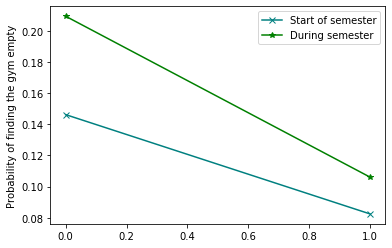

In [129]:
# Probability of finding the gym empty - start of/during semester
plt.figure()
fig.suptitle('Probability of finding the gym empty')
plt.plot(sem.is_start_of_semester, sem.number_people, color = 'teal', marker = 'x', label = "Start of semester")
plt.ylabel('Probability of finding the gym empty')
plt.plot(dur.is_during_semester, dur.number_people, color = 'green', marker = '*', label = "During semester")
plt.legend()
plt.show()

The gym is less likely to be empty at the start of the semester, and during the semester.